### Introduction to Statistical Analysis in Python

#### 1. Basic Concepts and Data Exploration

In [46]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize']  =(12,8)
plt.rcParams['font.size'] = 12

In [48]:
# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

heart_data = pd.read_csv(url, names=column_names, na_values="?")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [49]:
# basic info
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [50]:
# check for missing values
print("Missing values per column: /n")
print(heart_data.isnull().sum())

Missing values per column: /n
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [51]:
# fill missing values with median 
heart_data = heart_data.fillna(heart_data.median())
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [52]:
# basic statistic
print("Basic Statistical Summary:")
print(heart_data.describe())

Basic Statistical Summary:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.663366   


#### 2. Basic Data Visualization

In [53]:
# convert target variable into binary
heart_data["target"] = heart_data["target"].apply(lambda x: 0 if x==0 else 1)

#convert sex variable into categorical
heart_data["sex"] = heart_data["sex"].map({0: 'Female', 1 : 'Male'})

In [54]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,Male,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,Male,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,Male,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,Male,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,Female,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


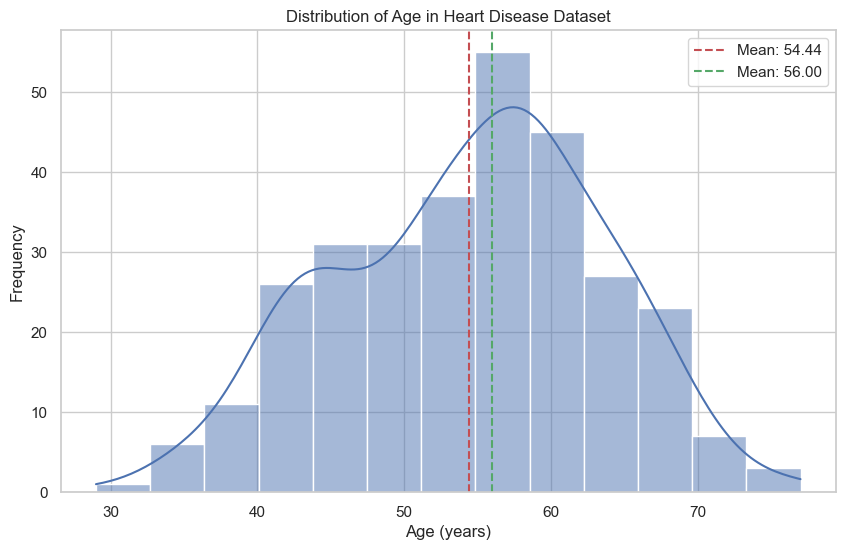

In [55]:
# Simple Age Histogram
plt.figure(figsize=(10,6))
sns.histplot(heart_data.age, kde='True')
plt.title("Distribution of Age in Heart Disease Dataset")
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.axvline(heart_data['age'].mean(), color='r', linestyle='--',
          label=f"Mean: {heart_data['age'].mean():.2f}")
plt.axvline(heart_data['age'].median(), color='g', linestyle='--',
          label=f"Mean: {heart_data['age'].median():.2f}")
plt.legend()
plt.show()

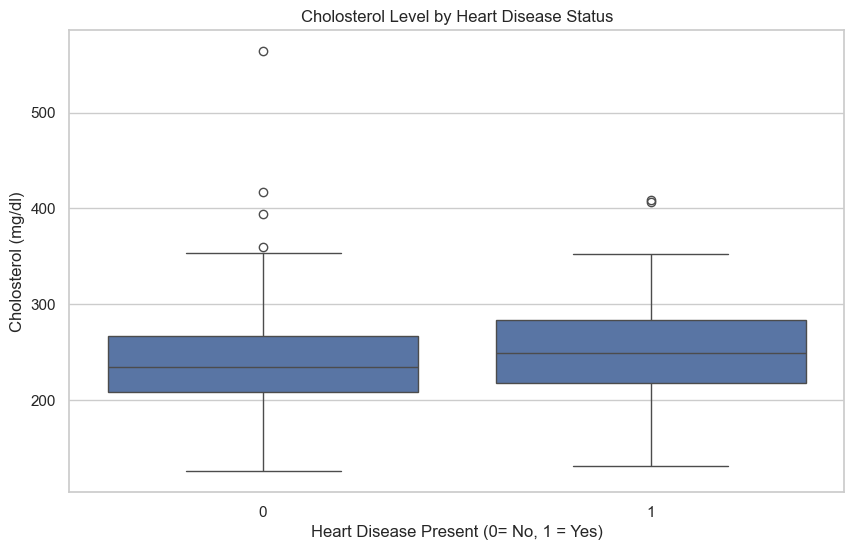

In [56]:
# Box plot of cholosterol by target
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='chol', data=heart_data)
plt.title("Cholosterol Level by Heart Disease Status")
plt.xlabel('Heart Disease Present (0= No, 1 = Yes)')
plt.ylabel('Cholosterol (mg/dl)')
plt.show()

In [57]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,Male,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,Male,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,Male,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,Male,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,Female,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


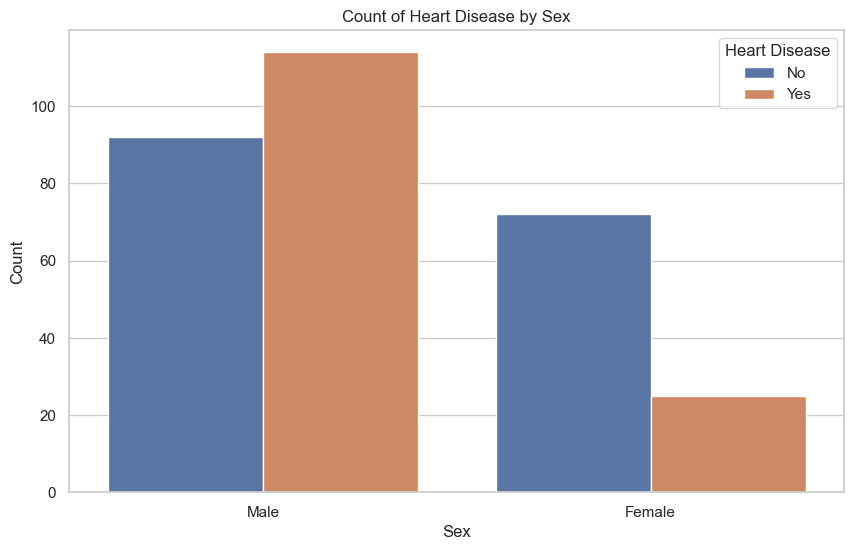

In [58]:
# Count plot of sex and heart disease
plt.figure(figsize=(10,6))
sns.countplot(x='sex', hue='target', data=heart_data)
plt.title("Count of Heart Disease by Sex")
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No','Yes'])
plt.show()

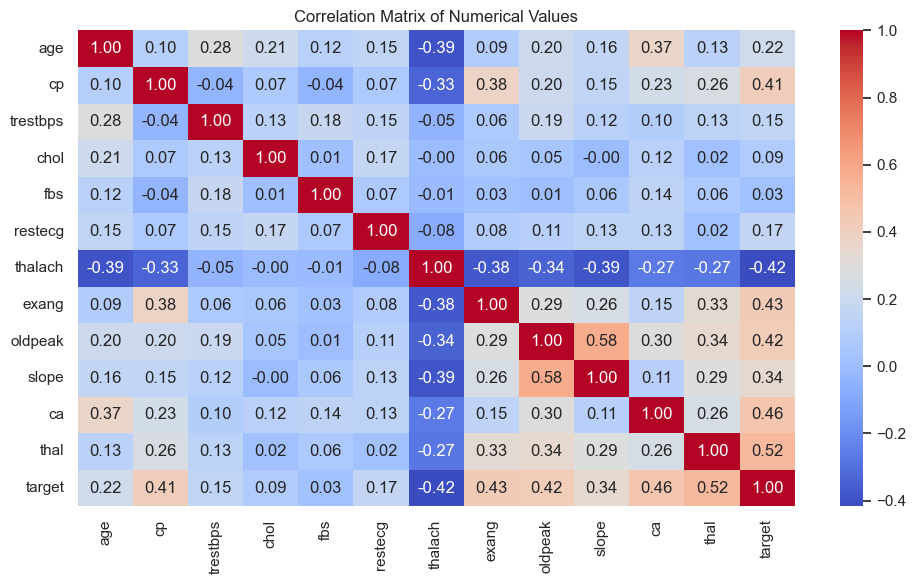

In [62]:
# correlation heatmap
plt.figure(figsize=(10,6))
numerical_cols = heart_data.select_dtypes(include=['float64','int64']).columns
correlation_matrix = heart_data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Values")
plt.tight_layout()
plt.show()